<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="HEIG-VD Logo" width="100"/>

# Cours TAL - Laboratoire 6
# Trois méthodes de désambiguïsation lexicale

**Objectif**

L'objectif de ce laboratoire est d'implémenter et de comparer plusieurs méthodes de désambiguïsation lexicale (en anglais, *Word Sense Disambiguation* ou WSD).  Vous utiliserez un corpus avec plusieurs milliers de phrases, chaque phrase contenant une occurrence du mot anglais *interest* annotée avec le sens que ce mot possède dans la phrase respective.  Les trois méthodes sont les suivantes (elles seront détaillées par la suite) :

* Algorithme de Lesk simplifié.
* Utilisation de word2vec.
* Classification supervisée utilisant des traits lexicaux.

Les deux premières méthodes n'utilisent pas l'apprentissage automatique.  Elles fonctionnent selon le même principe : comparer le contexte d'une occurrence de *interest* avec chacune des définitions des sens (*synsets*) et choisir la définition la plus proche du contexte.  L'algorithme de Lesk définit la proximité comme le nombre de mots en commun, alors que word2vec la calcule comme la similarité de vecteurs.  La dernière méthode vise à classifier les occurrences de *interest*, les sens étant les classes, et les attributs étant les mots du contexte (apprentissage supervisé).

## 1. Analyse des données

Téléchargez le corpus *interest* depuis le [site du Prof. Ted Pedersen](http://www.d.umn.edu/~tpederse/data.html) (il se trouve en bas de sa page web).  Téléchargez l'archive ZIP marquée *original format without POS tags* et extrayez le fichier `interest-original.txt`.  Téléchargez également le fichier `README.int.txt` indiqué à la ligne au-dessus. Veuillez répondre brièvement aux questions suivantes :

a. Quelles sont les URL du fichier ZIP et celle du fichier `README.int.txt` ?

b. Quel est le format du fichier `interest-original.txt` et comment sont annotés les sens de *interest* ?

c. Est-ce qu'il y a aussi des occurrences au pluriel (*interests*) à traite ?

d. Comment sont annotées les phrases qui contiennent plusieurs occurrences du mot *interest* ?

In [17]:
# Veuillez répondre ici (en commentaire) aux questions.

# a. Les URL sont les suivantes :
# https://www.d.umn.edu/~tpederse/Data/interest-original.nopos.tar.gz
# https://www.d.umn.edu/~tpederse/Data/README.int.txt

# b. Le format du fichier `interest-original.txt` est le suivant : chaque phrase est délimitée par des $$.
# Aussi, chaque occurrence du mot *interest* est écrite avec le numéro de son sens. Par exemple, interest_6.

# c. Oui, il y a aussi des occurrences au pluriel. Elles sont annotées de la même manière que les occurrences au singulier,
# mais avec un "s" à la fin. Par exemple, interests_4.

# d. Les phrases contienant plusieurs occurrences du mot *interest* ne sont annotées qu'une seule fois.

# Par exemple, avec la phrase "it  is n't *interested in mounting  ...  the growing interest_1  in  the british concern"
# on voit que le premier mot "interested" commence par un * qui indique qu'il ne s'agit pas de l'occurence du mot *interest*
# qui nous intéresse. Il faut donc ignorer ce mot. De plus, le mot "interest_1" est annoté avec le numéro de son sens, ici 1.

# La phrase est ensuite dupliquée en échangant l'intérêt pour les deux mots *interest*.
# Celui qui était ignoré devient celui qui est annoté et l'autre est ignoré avec un *.

**1e.** D'après le fichier `README.int.txt`, quelles sont les définitions des six sens de *interest* annotés dans les données et quelles sont leurs fréquences ? Vous pouvez copier/coller l'extrait de `README`ici.

In [18]:
# Veuillez répondre ici (en commentaire) à la question.

# Sense 1 =  361 occurrences (15%) - readiness to give attention (En français : disposition à prêter attention)
# Sense 2 =   11 occurrences (01%) - quality of causing attention to be given to (En français : qualité de provoquer l'attention)
# Sense 3 =   66 occurrences (03%) - activity, etc. that one gives attention to (En français : activité, etc. à laquelle on prête attention)
# Sense 4 =  178 occurrences (08%) - advantage, advancement or favor (En français : avantage, avancement ou faveur)
# Sense 5 =  500 occurrences (21%) - a share in a company or business (En français : une part dans une société ou une entreprise)
# Sense 6 = 1252 occurrences (53%) - money paid for the use of money (En français : argent payé pour l'utilisation de l'argent)


**1f.** De quel dictionnaire viennent les sens précédents ? Où peut-on le consulter en ligne ?  Veuillez aligner les définitions du dictionnaire avec les six sens annotés en écrivant par exemple `Sense 3 = "an activity that you enjoy doing or a subject that you enjoy studying"`.

In [19]:
# Veuillez répondre ici (en commentaire) à la question.

# Les senses viennent de la version électronique de la première édition du Longman's Dictionary of Contemporary English.

# Nous pouvons le consulter en ligne à l'adresse suivante : https://www.ldoceonline.com/

# Sens 1 = "if you have an interest in something or someone, you want to know or learn more about them"
# Sens 2 = "a quality or feature of something that attracts your attention or makes you want to know more about it"
# Sense 3 = "an activity that you enjoy doing or a subject that you enjoy studying"
# Sens 4 = "the things that bring advantages to someone or something"
# Sens 5 = "if you have an interest in a particular company or industry, you own shares in it"
# Sens 6 = "the extra money that you must pay back when you borrow money"


**1g.** En consultant [WordNet en ligne](http://wordnetweb.princeton.edu/perl/webwn), trouvez les définitions des synsets  pour le **nom commun** *interest*.  Combien de synsets y a-t-il ?  Veuillez indiquer comme avant la **définition** de chaque synset pour chacun des six sens ci-dessus (au besoin, fusionner ou ignorer des synsets).

In [20]:
# Veuillez répondre ici (en commentaire) à la question.

# Sens 1 = "a sense of concern with and curiosity about someone or something"
# Sens 2 = "the power of attracting or holding one's attention "
# Sens 3 = "a social group whose members control some field of activity and who have common aims"
# Sens 4 = "a reason for wanting something done in the common interest"
# Sens 5 = "a right or legal share of something; a financial involvement with something"
# Sens 6 = "a fixed charge for borrowing money; usually a percentage of the amount borrowed"

**1h.** Définissez (manuellement, ou avec quelques lignes de code) une liste nommée `senses1` avec les mots des définitions du README, en supprimant les stopwords (p.ex. les mots < 4 lettres).  Affichez la liste.

In [21]:
import nltk

In [22]:
from random import randrange

In [23]:
# Veuillez répondre ici à la question et créer la variable 'senses1' (liste de 6 listes de chaînes).
senses1 = []

readme_string = "readiness to give attention\nquality of causing attention to be given to\nactivity etc that one gives attention to\nadvantage advancement or favor\na share in a company or business\nmoney paid for the use of money"


for sentence in readme_string.split("\n"):
    tokens = sentence.split(" ")
    senses = set([word for word in tokens if len(word) > 3])
    senses1.append(senses)

print(senses1)
print(len(senses1))
print(sum([len(sense) for sense in senses1]))

[{'attention', 'give', 'readiness'}, {'quality', 'given', 'causing', 'attention'}, {'activity', 'that', 'attention', 'gives'}, {'favor', 'advancement', 'advantage'}, {'business', 'company', 'share'}, {'paid', 'money'}]
6
19


**1i.** En combinant les définitions obtenues aux points (4) et (5) ci-dessus, construisez une liste nommée `senses2` avec pour chacun des sens de *interest* une liste de **mots-clés** correspondants.  Vous pouvez concaténer les définitions, puis écrire des instructions en Python pour extraire les mots (uniques).  Respectez l'ordre des sens données par `README`, et à la fin affichez `senses2`.

In [24]:
# Veuillez répondre ici à la question et créer la variable 'senses2' (liste de 6 listes de chaînes).
senses2 = []

string_f = "if you have an interest in something or someone, you want to know or learn more about them\na quality or feature of something that attracts your attention or makes you want to know more about it\nan activity that you enjoy doing or a subject that you enjoy studying\nthe things that bring advantages to someone or something\nif you have an interest in a particular company or industry, you own shares in it\nthe extra money that you must pay back when you borrow money"

string_g = "a sense of concern with and curiosity about someone or something\nthe power of attracting or holding one's attention\na social group whose members control some field of activity and who have common aims\na reason for wanting something done in the common interest\na right or legal share of something; a financial involvement with something\na fixed charge for borrowing money; usually a percentage of the amount borrowed"

string_f_split = string_f.split("\n")
string_g_split = string_g.split("\n")

for i in range(len(string_f_split)):
    tokens_f = string_f_split[i].split(" ")
    tokens_g = string_g_split[i].split(" ")
    tokens = tokens_f + tokens_g
    senses = set([word for word in tokens if len(word) > 3])
    senses2.append(senses)

print(senses2)
print(len(senses2))
print(sum([len(sense) for sense in senses2]))

[{'learn', 'curiosity', 'sense', 'have', 'something', 'about', 'someone', 'more', 'know', 'them', 'with', 'want', 'someone,', 'interest', 'concern'}, {'feature', 'holding', 'that', "one's", 'something', 'about', 'more', 'attracts', 'know', 'attention', 'power', 'attracting', 'quality', 'makes', 'want', 'your'}, {'whose', 'that', 'aims', 'doing', 'control', 'some', 'social', 'field', 'have', 'activity', 'group', 'subject', 'studying', 'members', 'enjoy', 'common'}, {'reason', 'that', 'wanting', 'something', 'someone', 'things', 'done', 'common', 'advantages', 'interest', 'bring'}, {'financial', 'have', 'company', 'something;', 'something', 'industry,', 'legal', 'with', 'particular', 'involvement', 'interest', 'shares', 'share', 'right'}, {'that', 'charge', 'usually', 'amount', 'extra', 'back', 'borrow', 'borrowed', 'money', 'when', 'percentage', 'borrowing', 'fixed', 'must', 'money;'}]
6
87


**1j.** Chargez les données depuis `interest-original.txt` dans une liste appelée `sentences` qui contient pour chaque phrase la liste des mots (sans les séparateurs *$$* et *===...*).  Ces phrases sont-elles déjà tokenisées en mots ?  Sinon, faites-le.  À ce stade, ne modifiez pas encore les occurrences annotées *interest(s)\_X*.  Comptez le nombre total de phrases et affichez-en trois au hasard.

In [25]:
import re

# Veuillez répondre ici à la question.
sentences = []

with open("data/interest-original.txt", "r", encoding="utf-8") as f:
    text = f.read()

# supprimer tous les '='
text = text.replace('=','')

# Séparer les phrases sur "$$"
raw_sentences = text.split("$$")

sentences = []
for raw in raw_sentences:
    # Nettoyer les sauts de ligne et espaces inutiles
    cleaned = raw.strip()
    if not cleaned:
        continue

    # Re-nettoyer les espaces et tokeniser
    tokens = cleaned.strip().split()
    if tokens:
        sentences.append(tokens)


print("Il y a {} phrases.\nEn voici 3 au hasard :".format(len(sentences)))
print(sentences[151:154])

Il y a 2368 phrases.
En voici 3 au hasard :
[['investor', 'interest_1', 'in', 'stock', 'funds', '``', 'has', "n't", 'stalled', 'at', 'all', ',', "''", 'mr.', 'hines', 'maintains', '.'], ["''", 'it', 'is', 'in', 'the', 'western', 'interest_4', 'to', 'see', 'mr.', 'gorbachev', 'succeed', '.'], ['revco', 'insists', 'that', 'the', 'proposal', 'is', 'simply', 'an', '``', 'expression', 'of', 'interest_1', ',', "''", 'because', 'under', 'chapter', '11', 'revco', 'has', '``', 'exclusivity', 'rights', "''", 'until', 'feb.', '28', '.']]


## 2. Algorithme de Lesk simplifié

**2a.** Définissez une fonction `wsd_lesk(senses, sentence)` qui prend deux arguments : une liste de listes de mots-clés (comme `senses1` et `senses2` ci-dessus) et une phrase avec une occurrence annotée de *interest* ou *interests*, et qui retourne l'index du sens le plus probable (entre 1 et 6) selon l'algorithme de Lesk.  Cet algorithme choisit le sens qui a le maximum de mots en commun avec le contexte de *interest*.  Vous pouvez choisir vous-mêmes la taille de ce voisinage (`window_size`).  En cas d'égalité entre deux sens, tirer la réponse au sort.

In [26]:
import random

def get_unique_words(sentence):
    return set([word for word in sentence if len(word) > 3])

def get_neighbors_of_word(sentence, window_size):
    word_idx = find_index_of_interest(sentence)

    begin = round(max(0, word_idx - window_size / 2))
    end = round(min(len(sentence), word_idx + window_size / 2))
    words = [sentence[i] for i in range(begin, end)]

    return get_unique_words(words)

def find_index_of_interest(sentence):
    for i in range(len(sentence)):
        if sentence[i].startswith('interest'):
            if '_' in sentence[i]:
                return i

def wsd_lesk(senses, sentence, window_size=8):
    best_indices = []
    best_score = 0

    context = get_neighbors_of_word(sentence, window_size)
    for i, sense in enumerate(senses):
        score = len(sense.intersection(context))
        if score > best_score:
            best_score = score
            best_indices = [i]
        if score == best_score:
            best_indices.append(i)

    return random.choice(best_indices) + 1

In [27]:
idx = 3
print(sentences[idx])
wsd_lesk(senses2, sentences[idx])

['j.p.', 'bolduc', ',', 'vice', 'chairman', 'of', 'w.r.', 'grace', '&', 'co.', ',', 'which', 'holds', 'a', '83.4', '%', 'interest_5', 'in', 'this', 'energy-services', 'company', ',', 'was', 'elected', 'a', 'director', '.']


1

In [28]:
word = 'interest_6'
print(word.startswith('interest'))

True


**2b.** Définissez maintenant une fonction `evaluate_wsd(fct_name, senses, sentences)` qui prend en paramètre le nom de la méthode de similarité (pour commencer : `wsd_lesk`) ainsi que la liste des mots-clés par sens, et la liste de phrases, et qui retourne le score de la méthode de similarité.  Ce score sera tout simplement le pourcentage de réponses correctes (sens trouvé identique au sens annoté).

In [29]:
def evaluate_wsd(fct_name, senses, sentences, window_size=8):
    correct = 0

    for s in sentences:
        expected = int(s[find_index_of_interest(s)].split('_')[1])
        pred = fct_name(senses, s, window_size)
        if expected == pred:
            correct += 1
    
    return correct / len(sentences)

In [30]:
evaluate_wsd(wsd_lesk, senses2, sentences)

0.19383445945945946

**2c.** En fixant au mieux la taille de la fenêtre autour de *interest*, quel est le meilleur score de la méthode de Lesk simplifiée ?  Quelle liste de sens conduit à de meilleurs scores, `senses1` ou `senses2` ?

In [31]:
ITERATIONS_COUNT = 100
senses_list = [senses1, senses2]
for window_size in range(2, 30, 2):
    for i, definitions in enumerate(senses_list):
        score = 0
        for _ in range(ITERATIONS_COUNT):
            score += evaluate_wsd(wsd_lesk, definitions, sentences, window_size)
        score /= ITERATIONS_COUNT

        print(f"Score for window size of {window_size} + senses{i+1} : ", score)




Score for window size of 2 + senses1 :  0.1658952702702703
Score for window size of 2 + senses2 :  0.17493243243243245
Score for window size of 4 + senses1 :  0.17081503378378377
Score for window size of 4 + senses2 :  0.18317145270270271
Score for window size of 6 + senses1 :  0.17251689189189187
Score for window size of 6 + senses2 :  0.19202702702702695
Score for window size of 8 + senses1 :  0.17755912162162166
Score for window size of 8 + senses2 :  0.19424831081081084
Score for window size of 10 + senses1 :  0.1794467905405406
Score for window size of 10 + senses2 :  0.20149915540540536
Score for window size of 12 + senses1 :  0.18223817567567566
Score for window size of 12 + senses2 :  0.2067567567567567
Score for window size of 14 + senses1 :  0.18001266891891887
Score for window size of 14 + senses2 :  0.20714949324324322
Score for window size of 16 + senses1 :  0.17936655405405413
Score for window size of 16 + senses2 :  0.2099408783783785
Score for window size of 18 + senses

*Réponse :*

Étant donné qu'il y a une partie "aléatoire" dans la recherche de la meilleure définition, nous avons mis en place une moyenne sur 100 itérations.

On constate qu'il ne semble pas il y avoir une limite supérieure pour la taille de la fenêtre. En d'autres termes, plus la fenêtre est grande, mieux c'est. On remarque également que 
De manière générale, senses1 donne toujours de moins bon scores que senses2, qui est plus riche en mots.

## 3. Utilisation de word2vec pour la similarité contexte vs. synset

**3a.** En réutilisant une partie du code de `wsd_lesk`, veuillez maintenant définir une fonction `wsd_word2vec(senses, sentence)` qui choisit le sens en utilisant la similarité **word2vec** étudiée dans le labo précédent. 
* Vous pouvez chercher dans la [documentation des KeyedVectors](https://radimrehurek.com/gensim/models/keyedvectors.html) comment calculer directement la similarité entre deux listes de mots.
* Comme `wsd_lesk`, la nouvelle fonction `wsd_word2vec` prend en argument une liste de listes de mots-clés par sens (comme `senses1` et `senses2` ci-dessus), et une phrase avec une occurrence annotée de *interest* ou *interests*.
* La fonction retourne le numéro du sens le plus probable selon la similarité word2vec entre les mots du sens et ceux du voisinage de *interest*.  En cas d'égalité, tirer le sens au sort.
* Vous pouvez régler la taille du voisinage (`window_size`) par l'expérimentation.  

In [16]:
import gensim
from gensim.models import KeyedVectors
path_to_model = "../Labo5/data/GoogleNews-vectors-negative300.bin" # à adapter
wv_model = gensim.models.KeyedVectors.load_word2vec_format(path_to_model, binary=True)  # C bin format

In [35]:
import math

def wsd_word2vec(senses, sentence, window_size=8):
    best_indices = []
    best_score = -math.inf

    context = get_neighbors_of_word(sentence, window_size)
    for i, sense in enumerate(senses):
        score = wv_model.n_similarity(context, sense)
        if score > best_score:
            best_score = score
            best_indices = [i]
        if score == best_score:
            best_indices.append(i)

    return random.choice(best_indices) + 1


**3b.** Appliquez maintenant la même méthode `evaluate_wsd` avec la fonction `wsd_word2vec` (en cherchant une bonne valeur de la taille de la fenêtre) et affichez le score de la similarité word2vec.  Comment se compare-t-il avec le score précédent (Lesk) ?

In [66]:
senses_list = [senses1, senses2]
for window_size in range(2, 30, 2):
    for i, definitions in enumerate(senses_list):
        score = evaluate_wsd(wsd_word2vec, definitions, sentences, window_size)

        print(f"Score for window size of {window_size} + senses{i+1} : ", score)

Score for window size of 2 + senses1 :  0.17145270270270271
Score for window size of 2 + senses2 :  0.25506756756756754
Score for window size of 4 + senses1 :  0.265625
Score for window size of 4 + senses2 :  0.5464527027027027
Score for window size of 6 + senses1 :  0.265625
Score for window size of 6 + senses2 :  0.5477195945945946
Score for window size of 8 + senses1 :  0.3125
Score for window size of 8 + senses2 :  0.5570101351351351
Score for window size of 10 + senses1 :  0.3374155405405405
Score for window size of 10 + senses2 :  0.5561655405405406
Score for window size of 12 + senses1 :  0.3454391891891892
Score for window size of 12 + senses2 :  0.5519425675675675
Score for window size of 14 + senses1 :  0.3483952702702703
Score for window size of 14 + senses2 :  0.551097972972973
Score for window size of 16 + senses1 :  0.34755067567567566
Score for window size of 16 + senses2 :  0.5375844594594594
Score for window size of 18 + senses1 :  0.3559966216216216
Score for window s

*Réponse :*

La fenêtre optimale semble se trouver entre 8 et 14 où on obtient une accuracy autour de ***0.55***.

De nouveau, on remarque que senses2 donne de meilleurs résultats que senses1, probablement dû au fait que senses2 est plus riche en mots.

## 4. Classification supervisée avec des traits lexicaux
Vous entraînerez maintenant des classifieurs pour prédire le sens d'une occurrence dans une phrase.  Le premier but sera de transformer chaque phrase en un ensemble d'attributs pour formater les données en vue des expériences de classification.

Veuillez utiliser le classifieur `NaiveBayesClassifier` fourni par NLTK.  Le mode d'emploi se trouve dans le [Chapitre 6, sections 1.1-1.3](https://www.nltk.org/book/ch06.html) du livre NLTK.  Consultez-le attentivement pour trouver comment formater les données.  De plus, il faudra séparer les données en sous-ensembles d'entraînement et de test.

On vous propose de nommer les attributs `word-k`, ..., `word-2`, `word-1`, `word+1`, `word+2`, ..., `word+k` (fenêtre de taille `2*k` autour de *interest*).  Leurs valeurs sont les mots observés aux emplacements respectifs, ou `NONE` si la position dépasse l'étendue de la phrase.  Vous ajouterez un attribut nommé `word0` qui est l'occurrence du mot *interest* au singulier ou au pluriel.  

Pour chaque occurrence de *interest*, vous devrez donc créer la représentation suivante (où `6` est le numéro du sens, essentiel pour l'entraînement, mais à cacher lors de l'évaluation) :
```
[{'word-1': 'in', 'word+1': 'rates', 'word-2': 'declines', 'word+2': 'NONE', 'word0': 'interest'}, 6]
```

**4a.** En partant de la liste des phrases appelée `sentences` préparée plus haut, veuillez générer la liste avec toutes les représentation, appelée `items_with_features`.  Vous pouvez vous aider du livre NLTK.

In [ ]:
items_with_features = []

def build_key(idx, center_idx):
    diff = abs(idx - center_idx)
    sign = '-' if idx < center_idx else '+'
    return 'word'+sign+str(diff)

def extract_number(interest_str):
    return int(interest_str.split('_')[1])

for s in sentences:
    word0_idx = find_index_of_interest(s)
    features = {}
    for i, word in enumerate(s):
        if i is not word0_idx:
            features[build_key(i, word0_idx)] = word
    features['word0'] = s[word0_idx]
    items_with_features.append([features, extract_number(s[word0_idx])])


print(len(items_with_features))
print(items_with_features[151:154])

2368
[[{'word-1': 'investor', 'word+1': 'in', 'word+2': 'stock', 'word+3': 'funds', 'word+4': '``', 'word+5': 'has', 'word+6': "n't", 'word+7': 'stalled', 'word+8': 'at', 'word+9': 'all', 'word+10': ',', 'word+11': "''", 'word+12': 'mr.', 'word+13': 'hines', 'word+14': 'maintains', 'word+15': '.', 'word0': 'interest_1'}, 1], [{'word-6': "''", 'word-5': 'it', 'word-4': 'is', 'word-3': 'in', 'word-2': 'the', 'word-1': 'western', 'word+1': 'to', 'word+2': 'see', 'word+3': 'mr.', 'word+4': 'gorbachev', 'word+5': 'succeed', 'word+6': '.', 'word0': 'interest_4'}, 4], [{'word-11': 'revco', 'word-10': 'insists', 'word-9': 'that', 'word-8': 'the', 'word-7': 'proposal', 'word-6': 'is', 'word-5': 'simply', 'word-4': 'an', 'word-3': '``', 'word-2': 'expression', 'word-1': 'of', 'word+1': ',', 'word+2': "''", 'word+3': 'because', 'word+4': 'under', 'word+5': 'chapter', 'word+6': '11', 'word+7': 'revco', 'word+8': 'has', 'word+9': '``', 'word+10': 'exclusivity', 'word+11': 'rights', 'word+12': "''",

**4b.** Veuillez séparer les données aléatoirement en 80% pour l'entraînement et 20%  pour l'évaluation.  Veuillez faire une division stratifiée : les deux sous-ensembles doivent contenir les mêmes proportions de sens que l'ensemble de départ.  Ils seront appelés `iwf_train` et `iwf_test`.

In [48]:
from random import shuffle
from sklearn.model_selection import train_test_split

iwf_train = []
iwf_test  = []

features = [item[0] for item in items_with_features]
labels = [item[1] for item in items_with_features]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, stratify=labels, random_state=13042001)

iwf_train = list(zip(X_train, y_train))
iwf_test = list(zip(X_test, y_test))

print(len(iwf_train), ' ', len(iwf_test))
print(iwf_test[:2], iwf_test[-2:])

1894   474
[({'word-4': 'ms.', 'word-3': 'negus', 'word-2': 'noted', 'word-1': 'that', 'word+1': 'rates', 'word+2': 'generally', 'word+3': 'declined', 'word+4': 'following', 'word+5': 'friday', 'word+6': "'s", 'word+7': 'employment', 'word+8': 'report', 'word+9': '.', 'word0': 'interest_6'}, 6), ({'word-33': 'in', 'word-32': 'a', 'word-31': 'filing', 'word-30': 'with', 'word-29': 'the', 'word-28': 'securities', 'word-27': 'and', 'word-26': 'exchange', 'word-25': 'commission', 'word-24': ',', 'word-23': 'parsow', 'word-22': 'and', 'word-21': 'elkhorn', 'word-20': ',', 'word-19': 'which', 'word-18': 'together', 'word-17': 'hold', 'word-16': '8.685', 'word-15': '%', 'word-14': 'of', 'word-13': 'caci', 'word-12': "'s", 'word-11': 'common', 'word-10': 'shares', 'word-9': ',', 'word-8': 'said', 'word-7': 'they', 'word-6': 'think', 'word-5': 'it', 'word-4': 'is', 'word-3': 'in', 'word-2': 'the', 'word-1': 'best', 'word+1': 'of', 'word+2': 'caci', 'word+3': 'stockholders', 'word+4': 'that', 'w

**4c.** Veuillez créer une instance de `NaiveBayesClassifier`, l'entraîner sur `iwf_train` et la tester sur `iwf_test` (voir la documentation NLTK).  En expérimentant avec différentes largeurs de fenêtres, quel est le meilleur score que vous obtenez (avec la fonction `accuracy` de NLTK) sur l'ensemble de test ?  Comment se compare-t-il avec les précédents ?

In [ ]:
from nltk.classify import naivebayes 

model = naivebayes.NaiveBayesClassifier.train(iwf_train)

print(nltk.classify.accuracy(model, iwf_test))


0.7869198312236287


**4d.** En utilisant la fonction `show_most_informative_features()`, veuillez afficher les attributs les plus informatifs et commenter le résultat.

In [54]:
print(model.show_most_informative_features())

Most Informative Features
                  word+1 = 'in'                1 : 6      =    103.6 : 1.0
                  word-1 = 'other'             3 : 6      =     46.2 : 1.0
                  word+1 = 'of'                4 : 6      =     43.1 : 1.0
                  word-7 = None                6 : 2      =     36.7 : 1.0
                 word-10 = None                6 : 2      =     31.2 : 1.0
                  word-5 = None                6 : 3      =     29.1 : 1.0
                  word-4 = 'after'             5 : 6      =     28.2 : 1.0
                  word+4 = None                6 : 2      =     28.1 : 1.0
                 word+11 = None                6 : 2      =     27.9 : 1.0
                  word-9 = None                6 : 2      =     27.5 : 1.0
None


*Réponse :*

Le top 3 des mots les plus importants est intéressant. La signification du mot interest est fortement influencée si il est suivi de 'in' (interest in **something**), de 'of' (interest **of**) ou précédé de 'other' (**other** interest).
Ce sont tous les 3 des prépositions. On peut en conclure que les prépositions permettent facilement de discriminer certaines utilisations du mot par rapport à d'autres.

**4e.** On souhaite également obtenir les scores pour chaque sens.  Pour ce faire, il faut demander les prédictions une par une au classifieur (voir le [livre NLTK](https://www.nltk.org/book/ch06.html)), et comptabiliser les prédictions correctes pour chaque sens.  Vous pouvez vous inspirer de `evaluate_wsd`, et écrire une fonction `evaluate_wsd_supervised(classifier, items_with_features)`, que vous appliquerez aux donnés `iwf_test`.  Veuillez afficher ces scores.

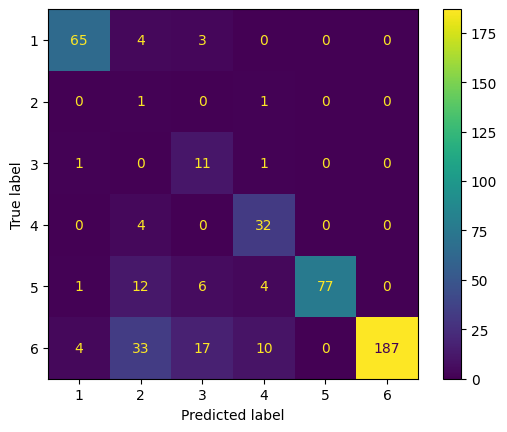

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

predictions = model.classify_many(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, predictions)

In [65]:
import numpy as np
from sklearn.metrics import classification_report

def evaluate_wsd_supervised(classifier, items_with_features):
    predictions = model.classify_many([f[0] for f in items_with_features])
    expected = [f[1] for f in items_with_features]
    return classification_report(expected, predictions)

scores_per_class = evaluate_wsd_supervised(model, iwf_test)
print(scores_per_class)

              precision    recall  f1-score   support

           1       0.92      0.90      0.91        72
           2       0.02      0.50      0.04         2
           3       0.30      0.85      0.44        13
           4       0.67      0.89      0.76        36
           5       1.00      0.77      0.87       100
           6       1.00      0.75      0.85       251

    accuracy                           0.79       474
   macro avg       0.65      0.78      0.65       474
weighted avg       0.94      0.79      0.84       474



## 5. Conclusion

Veuillez recopier ci-dessous, en guise de conclusion, les scores des trois expériences réalisées, pour pouvoir les comparer d'un coup d'oeil.  Quel est le meilleur score obtenu?

*Résultats obtenus :*

Scores d'accuracy :
- Algorithme de Lesk simplifié : 0.221
- WSD basé sur la similarity avec word2vec :  0.5570101351351351
- NaiveBayesClassifier : 0.79

Le meilleur score a été obtenu avec le NaivesBayesClassifier de NLTK.






## Fin du laboratoire

Merci de nettoyer votre feuille, sauvegarder le résultat, et soumettre le *notebook* sur Cyberlearn.